## 🎬 **Análise por Variável Determinante**

---

### Afinal, o que tras lucro a um filme?
---

#### Nesta análise, buscamos entender os elementos que influenciam a rentabilidade de uma produção cinematográfica. Escolhemos 5 variáveis determinantes na produção para o sucesso do Lucro na indústria dos cinemas

#### Com isso, vamos utilizar a seguinte tabela de exemplo

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats

fatores_lucro_sp = "spreadsheets/fatores_lucro.xlsx"
df_vd = pd.read_excel(fatores_lucro_sp, sheet_name="variaveis_determinantes")
df_cv = pd.read_excel(fatores_lucro_sp, sheet_name="combinacoes_variaveis")

# Definindo variáveis para filtro
col = "Variável Determinante"
df_VFX = df_vd[df_vd[col] == "Efeitos Visuais (VFX)"]
df_MAX = df_vd[df_vd[col] == "Som Imersivo (IMAX/Dolby)"]
df_ART = df_vd[df_vd[col] == "Direção de Arte/Fotografia"]
df_RIT = df_vd[df_vd[col] == "Edição Rítmica"]
df_60K = df_vd[df_vd[col] == "3D / 60K Tecnologia"]

In [116]:
a = df_vd.head()
b = df_vd.tail()

display(a)
display(b)

,Variável Determinante,Filme Exemplo,Custo Min (US$),Custo Máx (US$),Receita Máx (US$),Lucro Médio (US$),ROI
0,Efeitos Visuais (VFX),Avatar: O Caminho da Água (2022),350M,460M,2.32B,1.92B,4.49
1,Efeitos Visuais (VFX),Avengers: Endgame (2019),356M,450M,2.8B,2.4B,5.74
2,Efeitos Visuais (VFX),Jurassic World (2015),150M,200M,1.67B,1.485B,8.90
3,Efeitos Visuais (VFX),Star Wars: The Force Awakens (2015),245M,300M,2.07B,1.812B,6.40
4,Efeitos Visuais (VFX),The Lion King (2019),250M,260M,1.66B,1.4B,4.60


,Variável Determinante,Filme Exemplo,Custo Min (US$),Custo Máx (US$),Receita Máx (US$),Lucro Médio (US$),ROI
60,Roteiros e Atores,The Irishman (2019),"$160M (De Niro, Pacino, Pesci)",$200M,$8M (Netflix)*,-$192M,-0.96000
61,Roteiros e Atores,Little Women (2019),"$10M (Saoirse Ronan, Meryl Streep)",$40M,$218M,$178M,4.45000
62,Roteiros e Atores,Lady Bird (2017),$3M (Saoirse Ronan),$10M,$79M,$69M,6.90000
63,Roteiros e Atores,Crazy Rich Asians (2018),$5M (Henry Golding + elenco asiático),$30M,$238M,$208M,6.93000
64,Roteiros e Atores,Pulp Fiction (1994),"$10M (Travolta, Samuel L. Jackson)",$8M,$214M,$206M,0.02575


### 🔮 **1. Efeitos Visuais + CGI Alto Nível (VFX)**
---



**Para retratar e estudar sobre Efeitos Visuais + CGI Alto Nível (VFX), escolhemos esta base de dados:**

In [ ]:
display(df_VFX)

**Impacto no Custo:**
- Um dos elementos mais caros da produção, especialmente em filmes de ficção científica ou fantasia.
- Efeitos visuais de alta qualidade requerem tecnologia avançada e profissionais especializados, aumentando significativamente o orçamento.

**Impacto no Lucro:**
- VFX impressionantes podem atrair grandes audiências, especialmente em filmes de ação e ficção científica, potencializando a bilheteria.

**Impacto no Desenvolvimento:**
- A produção de VFX demanda tempo e coordenação entre diversas equipes, podendo prolongar o cronograma de produção.

**Exemplos:**
- **❌ VFX Mal Avaliado:** *Cats* (2019) - Efeitos visuais perturbadores com design "uncanny valley"
  - 🔗 [The Guardian](https://www.theguardian.com/film/2019/dec/22/cats-film-a-disaster-of-hair-raising-proportions)

- **✅ VFX Bem Avaliado:** *Avatar* (2009) - Revolução no CGI 3D
  - 🔗 [BBC News](https://www.bbc.com/news/entertainment-arts-50812799)

- **✅ VFX Bem Avaliado:** *Duna 2* (2023) - Oscar de Melhores Efeitos Visuais
  - 🔗 [Oscars.org](https://www.oscars.org/oscars/ceremonies/2024)

### 🔊 **2. Design de Som + Mixagem Imersiva (Dolby Atmos / IMAX Sound)**
---

**Impacto no Custo:**
- Requer mixagem profissional e equipamentos de ponta, encarecendo a pós-produção.
- A implementação de som imersivo exige equipamentos especializados e profissionais experientes, elevando os custos de pós-produção.

**Impacto no Lucro:**
- Um design de som de alta qualidade pode melhorar a experiência do espectador, aumentando a satisfação e o boca a boca positivo.

**Impacto no Desenvolvimento:**
- Requer planejamento detalhado desde a gravação até a mixagem final, podendo estender o tempo de pós-produção.

**Exemplos:**
- **❌ Som Mal Avaliado:** *Transformers: Age of Extinction* (2014) - Mixagem caótica
  - 🔗 [Rotten Tomatoes](https://www.rottentomatoes.com/m/transformers_age_of_extinction)

- **✅ Som Bem Avaliado:** *Dunkirk* (2017) - Oscar de Melhor Mixagem de Som
  - 🔗 [Oscars.org](https://www.oscars.org/oscars/ceremonies/2018)

### 🎨 **3. Fotografia + Direção de Arte**
---

**Impacto no Custo:**
- Inclui cenografia, figurino e iluminação — com grande peso orçamentário.
- Investimentos em cenografia, figurinos e design visual aumentam os custos, mas são essenciais para criar uma estética envolvente.

**Impacto no Lucro:**
- Uma direção de arte distinta pode tornar o filme memorável, influenciando positivamente a crítica e o público.

**Impacto no Desenvolvimento:**
- Exige colaboração entre departamentos e planejamento meticuloso para garantir coesão visual.

**Exemplos:**
- **❌ Direção de Arte Mal Avaliada:** *Suicide Squad* (2016) - Estética confusa
  - 🔗 [Variety](https://variety.com/2016/film/reviews/suicide-squad-review-margot-robbie-1201831546/)

- **✅ Direção de Arte Bem Avaliada:** *The Grand Budapest Hotel* (2014) - Oscar de Direção de Arte
  - 🔗 [IndieWire](https://www.indiewire.com/gallery/best-cinematography-movies-shots/)

### ✂️ **4. Edição Rítmica + Montagem**
---

**Impacto no Custo:**
- Embora menos onerosa que outras variáveis, uma edição eficaz requer editores experientes e tempo dedicado, influenciando o orçamento.

**Impacto no Lucro:**
- Uma montagem bem executada mantém o ritmo e o engajamento do público, impactando positivamente a recepção do filme.

**Impacto no Desenvolvimento:**
- Crucial na pós-produção para manter ritmo e coesão narrativa.
- A edição é essencial para moldar a narrativa e corrigir falhas de gravação.

**Exemplos:**
- **❌ Edição Mal Avaliada:** *The Snowman* (2017) - Cenas faltando e edição incoerente
  - 🔗 [The Verge](https://www.theverge.com/2017/10/13/16471250/the-snowman-movie-bad-editing-missing-scenes)

- **✅ Edição Bem Avaliada:** *Mad Max: Fury Road* (2015) - Oscar de Melhor Edição
  - 🔗 [The Hollywood Reporter](https://www.hollywoodreporter.com/movies/movie-news/mad-max-fury-road-editing-oscar-864072/)

### 🕶️ **5. Tecnologia 3D/4DX (IMAX / 4K / HFR)**
---

**Impacto no Custo:**
- Pode justificar ingressos mais caros e atrair público para experiências cinematográficas imersivas.
- A adoção de tecnologias avançadas implica em equipamentos especializados e processos de produção mais complexos, elevando os custos.

**Impacto no Lucro:**
- Quando bem utilizadas, essas tecnologias podem oferecer experiências imersivas, atraindo mais espectadores e justificando preços de ingressos mais altos.

**Impacto no Desenvolvimento:**
- Exige planejamento desde a pré-produção para garantir que as tecnologias sejam integradas de forma eficaz à narrativa.

**Exemplos:**
- **❌ Tecnologia Mal Avaliada:** *The Hobbit: An Unexpected Journey* (2012) - HFR (48fps) artificial
  - 🔗 [Wired](https://www.wired.com/2012/12/hobbit-hfr-48fps-controversy/)

- **✅ Tecnologia Bem Avaliada:** *Interstellar* (2014) - Uso exemplar de IMAX
  - 🔗 [IMDb](https://www.imdb.com/title/tt0816692/technical)

### 🧑🏻‍💼 **6. Roteiristas e Atores**
---

**Impacto no Custo**  
- **Roteiristas renomados e atores de grande popularidade** podem aumentar significativamente os orçamentos dos filmes devido a salários elevados e participação nos lucros.  
- Contratar **estrelas globais ou escritores premiados** exige investimentos altos, mas garante maior visibilidade.  

**Impacto no Lucro**  
- Nomes consagrados atraem **público fiel**, aumentando vendas de ingressos e retorno financeiro.  
- Roteiros bem-escritos e atuações marcantes geram **críticas positivas e indicações a prêmios**, impulsionando o sucesso comercial.  

**Impacto no Desenvolvimento** 
- Um **bom roteiro** é a base para um filme de sucesso, exigindo tempo e revisões constantes antes da produção.  
- A **química entre os atores e a direção** pode definir o tom do filme, influenciando até mudanças no script durante as filmagens.  

**Exemplos:** 


**❌ Roteiro ou Elenco Mal Avaliado**
**Filme:** *Cats* (2019)  
- Problemas no roteiro e efeitos visuais mal recebidos, além de elenco superestrelado que não salvou o filme.  
- 🔗 [The Guardian](https://www.theguardian.com/film/2019/dec/20/cats-review-andrew-lloyd-webber)  


**✅ Roteiro ou Elenco Bem Avaliado**
**Filme:** *Parasite* (2019)  
- Roteiro brilhante e atuações impecáveis, levando a múltiplos Oscars, incluindo Melhor Roteiro Original.  
- 🔗 [Variety](https://variety.com/2020/film/news/parasite-oscars-best-picture-2020-1203502085/)  

## 📊 **Manipulando Tabelas**
---

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats

fatores_lucro_sp = "spreadsheets/fatores_lucro.xlsx"
df_vd = pd.read_excel(fatores_lucro_sp, sheet_name="variaveis_determinantes")
df_cv = pd.read_excel(fatores_lucro_sp, sheet_name="combinacoes_variaveis")

display(df_vd)

,Variável Determinante,Filme Exemplo,Custo Min (US$),Custo Máx (US$),Receita Máx (US$),Lucro Médio (US$),ROI
0,Efeitos Visuais (VFX),Avatar: O Caminho da Água (2022),350M,460M,2.32B,1.92B,4.49
1,Efeitos Visuais (VFX),Avengers: Endgame (2019),356M,450M,2.8B,2.4B,5.74
2,Efeitos Visuais (VFX),Jurassic World (2015),150M,200M,1.67B,1.485B,8.9
3,Efeitos Visuais (VFX),Star Wars: The Force Awakens (2015),245M,300M,2.07B,1.812B,6.4
4,Efeitos Visuais (VFX),The Lion King (2019),250M,260M,1.66B,1.4B,4.6
...,...,...,...,...,...,...,...
60,Roteiros e Atores,The Irishman (2019),"$160M (De Niro, Pacino, Pesci)",$200M,$8M (Netflix)*,-$192M,-0.96
61,Roteiros e Atores,Little Women (2019),"$10M (Saoirse Ronan, Meryl Streep)",$40M,$218M,$178M,4.45
62,Roteiros e Atores,Lady Bird (2017),$3M (Saoirse Ronan),$10M,$79M,$69M,6.9
63,Roteiros e Atores,Crazy Rich Asians (2018),$5M (Henry Golding + elenco asiático),$30M,$238M,$208M,6.93


In [100]:
col = "Variável Determinante"
df_VFX = df_vd[df_vd[col] == "Efeitos Visuais (VFX)"]
df_MAX = df_vd[df_vd[col] == "Som Imersivo (IMAX/Dolby)"]
df_ART = df_vd[df_vd[col] == "Direção de Arte/Fotografia"]
df_RIT = df_vd[df_vd[col] == "Edição Rítmica"]
df_60K = df_vd[df_vd[col] == "3D / 60K Tecnologia"]
df_ROT = df_vd[df_vd[col] == "Roteiros e Atores"]

In [101]:
display(df_VFX)

,Variável Determinante,Filme Exemplo,Custo Min (US$),Custo Máx (US$),Receita Máx (US$),Lucro Médio (US$),ROI
0,Efeitos Visuais (VFX),Avatar: O Caminho da Água (2022),350M,460M,2.32B,1.92B,4.49
1,Efeitos Visuais (VFX),Avengers: Endgame (2019),356M,450M,2.8B,2.4B,5.74
2,Efeitos Visuais (VFX),Jurassic World (2015),150M,200M,1.67B,1.485B,8.9
3,Efeitos Visuais (VFX),Star Wars: The Force Awakens (2015),245M,300M,2.07B,1.812B,6.4
4,Efeitos Visuais (VFX),The Lion King (2019),250M,260M,1.66B,1.4B,4.6
5,Efeitos Visuais (VFX),Avengers: Infinity War (2018),325M,400M,2.05B,1.7B,4.23
6,Efeitos Visuais (VFX),Spider-Man: No Way Home (2021),200M,250M,1.92B,1.7B,7.5
7,Efeitos Visuais (VFX),The Avengers (2012),220M,230M,1.52B,1.295B,4.89
8,Efeitos Visuais (VFX),Avatar (2009),237M,280M,2.92B,2.67B,10.26
9,Efeitos Visuais (VFX),Pirates of the Caribbean: On Stranger Tides (2...,250M,270M,1.05B,787M,2.15


In [102]:
display(df_MAX)

,Variável Determinante,Filme Exemplo,Custo Min (US$),Custo Máx (US$),Receita Máx (US$),Lucro Médio (US$),ROI
11,Som Imersivo (IMAX/Dolby),Duna (2021),150M,165M,410.7M,245.7M,0.64
12,Som Imersivo (IMAX/Dolby),Interstellar (2014),165M,180M,715M,545M,2.3
13,Som Imersivo (IMAX/Dolby),Mad Max: Fury Road (2015),150M,160M,380M,225M,0.5
14,Som Imersivo (IMAX/Dolby),Blade Runner 2049 (2017),150M,170M,265M,105M,-0.3
15,Som Imersivo (IMAX/Dolby),Inception (2010),160M,170M,840M,675M,3.22
16,Som Imersivo (IMAX/Dolby),The Dark Knight Rises (2012),230M,240M,1.08B,845M,2.67
17,Som Imersivo (IMAX/Dolby),Gravity (2013),100M,110M,723.2M,613.2M,5.13
18,Som Imersivo (IMAX/Dolby),Dunkirk (2017),100M,110M,530M,425M,3.25
19,Som Imersivo (IMAX/Dolby),The Revenant (2015),135M,150M,535M,395M,1.93
20,Som Imersivo (IMAX/Dolby),1917 (2019),90M,100M,390M,295M,2.28


In [103]:
display(df_ART)

,Variável Determinante,Filme Exemplo,Custo Min (US$),Custo Máx (US$),Receita Máx (US$),Lucro Médio (US$),ROI
22,Direção de Arte/Fotografia,O Rei Leão (2019),250M,260M,1.66B,1.4B,4.6
23,Direção de Arte/Fotografia,The Grand Budapest Hotel (2014),25M,35M,180M,150M,5
24,Direção de Arte/Fotografia,Mad Max: Fury Road (2015),150M,160M,380M,225M,0.5
25,Direção de Arte/Fotografia,Blade Runner 2049 (2017),150M,170M,265M,105M,-0.3
26,Direção de Arte/Fotografia,The Shape of Water (2017),19M,22M,200M,180M,8.47
27,Direção de Arte/Fotografia,Alice in Wonderland (2010),200M,220M,1.02B,810M,3.05
28,Direção de Arte/Fotografia,The Great Gatsby (2013),105M,115M,355M,245M,1.33
29,Direção de Arte/Fotografia,Pan's Labyrinth (2006),19M,22M,85M,65M,2.42
30,Direção de Arte/Fotografia,The Curious Case of Benjamin Button (2008),150M,170M,340M,180M,0.2
31,Direção de Arte/Fotografia,Hugo (2011),150M,170M,190M,30M,-0.8


In [104]:
display(df_RIT)

,Variável Determinante,Filme Exemplo,Custo Min (US$),Custo Máx (US$),Receita Máx (US$),Lucro Médio (US$),ROI
33,Edição Rítmica,Velozes & Furiosos 7 (2015),190M,190M,1.52B,1.33B,6
34,Edição Rítmica,Mad Max: Fury Road (2015),150M,160M,380M,225M,0.5
35,Edição Rítmica,Baby Driver (2017),34M,36M,230M,195M,4.74
36,Edição Rítmica,The Bourne Ultimatum (2007),110M,120M,445M,330M,2
37,Edição Rítmica,Whiplash (2014),3M,4M,52M,48.5M,15.17
38,Edição Rítmica,The Social Network (2010),40M,45M,230M,188M,3.7
39,Edição Rítmica,Inception (2010),160M,170M,840M,675M,3.22
40,Edição Rítmica,The Dark Knight (2008),185M,195M,1.01B,820M,3.43
41,Edição Rítmica,Dunkirk (2017),100M,110M,530M,425M,3.25
42,Edição Rítmica,The Matrix (1999),63M,70M,470M,405M,5.43


In [105]:
display(df_60K)

,Variável Determinante,Filme Exemplo,Custo Min (US$),Custo Máx (US$),Receita Máx (US$),Lucro Médio (US$),ROI
44,3D / 60K Tecnologia,Avatar (2009),237M,280M,2.92B,2.67B,10.26
45,3D / 60K Tecnologia,Gravidade (2013),100M,110M,723.2M,613.2M,5.13
46,3D / 60K Tecnologia,The Jungle Book (2016),175M,185M,970M,790M,3.51
47,3D / 60K Tecnologia,Life of Pi (2012),120M,130M,605M,480M,3
48,3D / 60K Tecnologia,Doctor Strange (2016),165M,175M,680M,510M,2.09
49,3D / 60K Tecnologia,How to Train Your Dragon 2 (2014),145M,155M,625M,475M,2.28
50,3D / 60K Tecnologia,Ready Player One (2018),175M,185M,585M,405M,1.31
51,3D / 60K Tecnologia,Tron: Legacy (2010),170M,180M,405M,230M,0.35
52,3D / 60K Tecnologia,Alita: Battle Angel (2019),170M,180M,405M,230M,0.35
53,3D / 60K Tecnologia,The Adventures of Tintin (2011),135M,150M,375M,235M,0.74


In [106]:
display(df_ROT)

,Variável Determinante,Filme Exemplo,Custo Min (US$),Custo Máx (US$),Receita Máx (US$),Lucro Médio (US$),ROI
55,Roteiros e Atores,Avengers: Endgame (2019),$200M+ (Robert Downey Jr. + elenco),$356M,$2.798B,$1.8B+,500%+
56,Roteiros e Atores,Parasite (2019),$2M (atores locais),$11M,$258M,$247M,0.02245
57,Roteiros e Atores,The Social Network (2010),$20M (Jesse Eisenberg + Andrew Garfield),$40M,$225M,$185M,4.6
58,Roteiros e Atores,Justice League (2017),"$100M+ (Ben Affleck, Gal Gadot)",$300M,$657M,Prejuízo ($60M),-0.2
59,Roteiros e Atores,Inception (2010),$50M (Leonardo DiCaprio),$160M,$836M,$676M,4.22
60,Roteiros e Atores,The Irishman (2019),"$160M (De Niro, Pacino, Pesci)",$200M,$8M (Netflix)*,-$192M,-0.96
61,Roteiros e Atores,Little Women (2019),"$10M (Saoirse Ronan, Meryl Streep)",$40M,$218M,$178M,4.45
62,Roteiros e Atores,Lady Bird (2017),$3M (Saoirse Ronan),$10M,$79M,$69M,6.9
63,Roteiros e Atores,Crazy Rich Asians (2018),$5M (Henry Golding + elenco asiático),$30M,$238M,$208M,6.93
64,Roteiros e Atores,Pulp Fiction (1994),"$10M (Travolta, Samuel L. Jackson)",$8M,$214M,$206M,0.02575


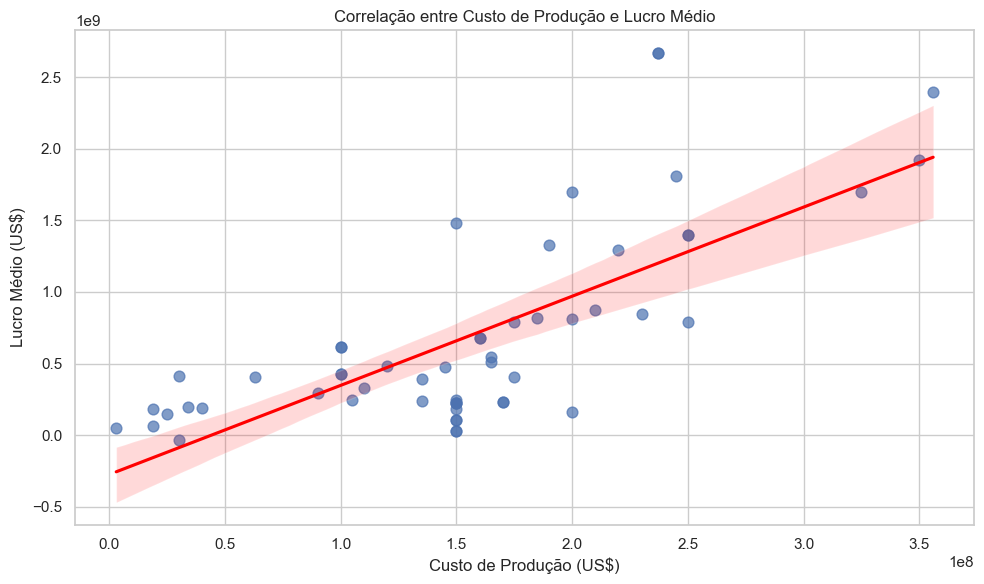

In [107]:
fatores_lucro_sp = "spreadsheets/fatores_lucro.xlsx"
df = pd.read_excel(fatores_lucro_sp, sheet_name='variaveis_determinantes')

def convert_to_number(value):
    if isinstance(value, str):
        value = value.upper().replace('$', '').replace(',', '').strip()
        if value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
    return pd.to_numeric(value, errors='coerce')


df = pd.read_excel(fatores_lucro_sp, sheet_name='variaveis_determinantes')

df['Custo Min (US$)'] = df['Custo Min (US$)'].apply(convert_to_number)
df['Lucro Médio (US$)'] = df['Lucro Médio (US$)'].apply(convert_to_number)

df_clean = df.dropna(subset=['Custo Min (US$)', 'Lucro Médio (US$)'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Custo Min (US$)',
    y='Lucro Médio (US$)',
    data=df_clean,
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)

plt.title('Correlação entre Custo de Produção e Lucro Médio')
plt.xlabel('Custo de Produção (US$)')
plt.ylabel('Lucro Médio (US$)')
plt.tight_layout()
plt.show()


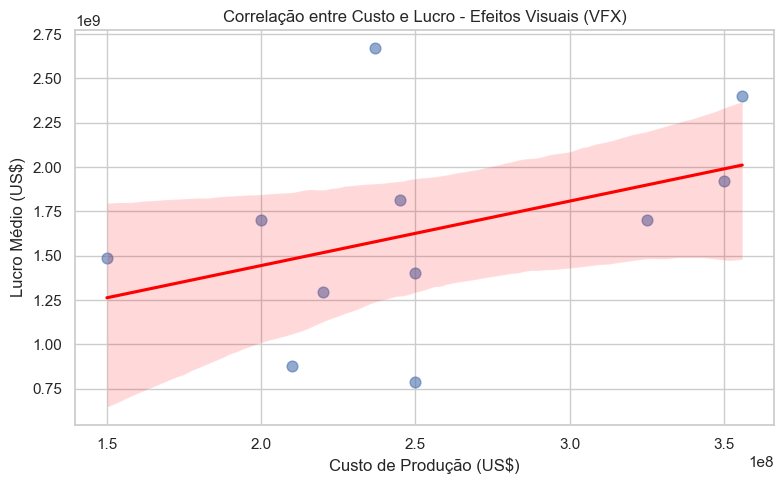

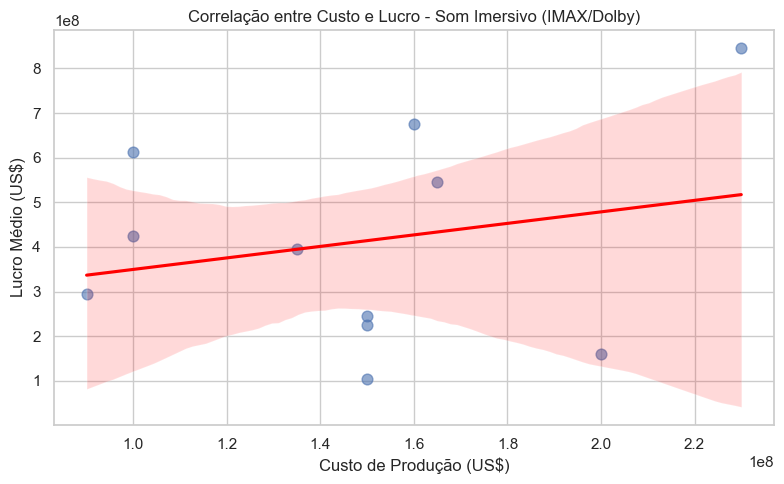

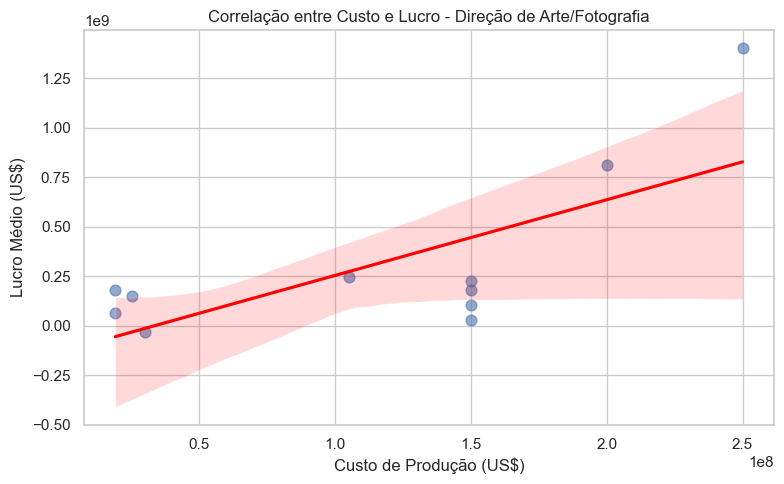

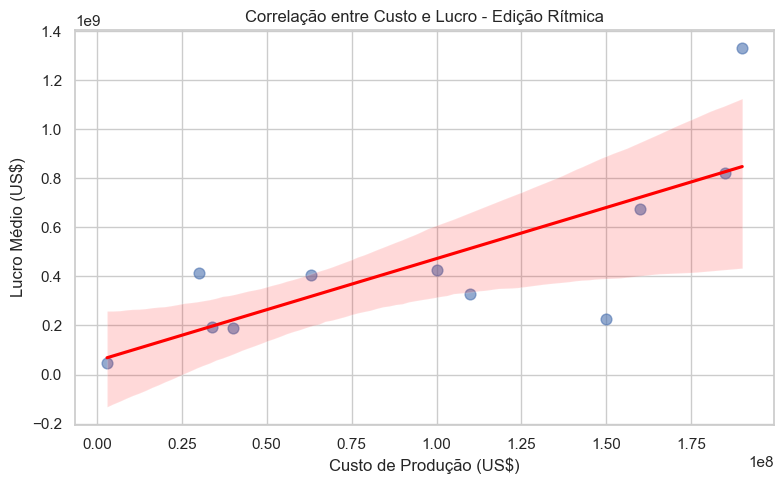

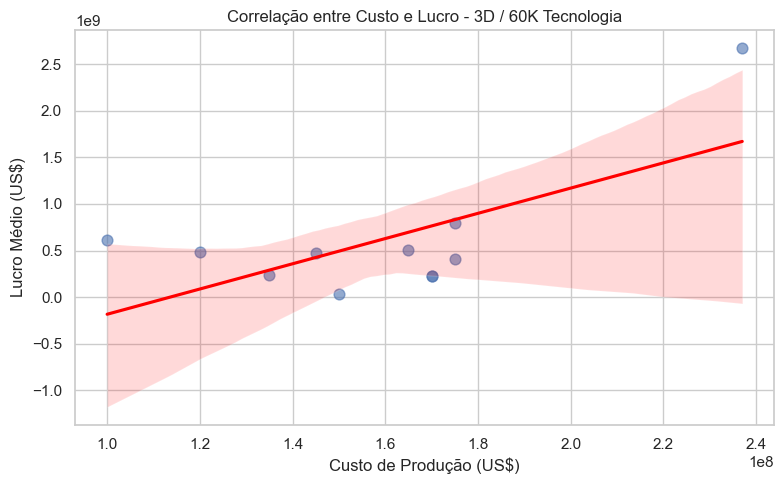

In [108]:
def convert_to_number(value):
    if isinstance(value, str):
        value = value.upper().replace('$', '').replace(',', '').strip()
        if value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
    return pd.to_numeric(value, errors='coerce')

df['Custo Min (US$)'] = df['Custo Min (US$)'].apply(convert_to_number)
df['Lucro Médio (US$)'] = df['Lucro Médio (US$)'].apply(convert_to_number)

df_clean = df.dropna(subset=['Custo Min (US$)', 'Lucro Médio (US$)', 'Variável Determinante'])

variaveis = df_clean['Variável Determinante'].unique()

sns.set(style="whitegrid")
for var in variaveis:
    subset = df_clean[df_clean['Variável Determinante'] == var]
    plt.figure(figsize=(8, 5))
    sns.regplot(
        x='Custo Min (US$)',
        y='Lucro Médio (US$)',
        data=subset,
        scatter_kws={'s': 60, 'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    plt.title(f'Correlação entre Custo e Lucro - {var}')
    plt.xlabel('Custo de Produção (US$)')
    plt.ylabel('Lucro Médio (US$)')
    plt.tight_layout()
    plt.show()

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_15784\2046259468.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roi_por_variavel.values, y=roi_por_variavel.index, palette='viridis')


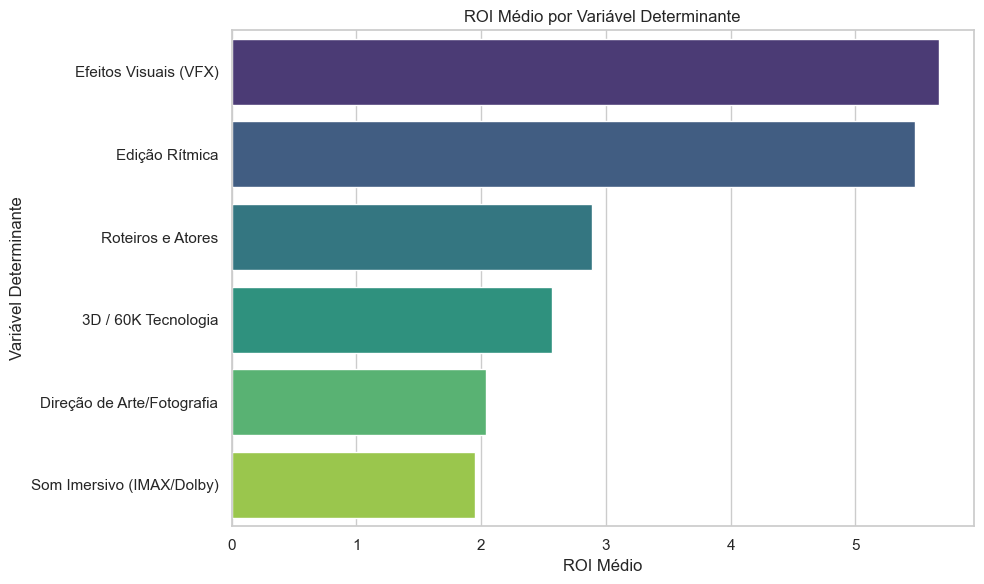

In [109]:
def convert_roi(value):
    try:
        return float(value)
    except:
        return pd.to_numeric(value, errors='coerce')

df_vd['ROI'] = df_vd['ROI'].apply(convert_roi)

roi_por_variavel = df_vd.groupby('Variável Determinante')['ROI'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=roi_por_variavel.values, y=roi_por_variavel.index, palette='viridis')

plt.title('ROI Médio por Variável Determinante')
plt.xlabel('ROI Médio')
plt.ylabel('Variável Determinante')
plt.tight_layout()
plt.show()

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_15784\4086679703.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variável Determinante', y='Custo Máx (US$)', data=df, palette='Set2')


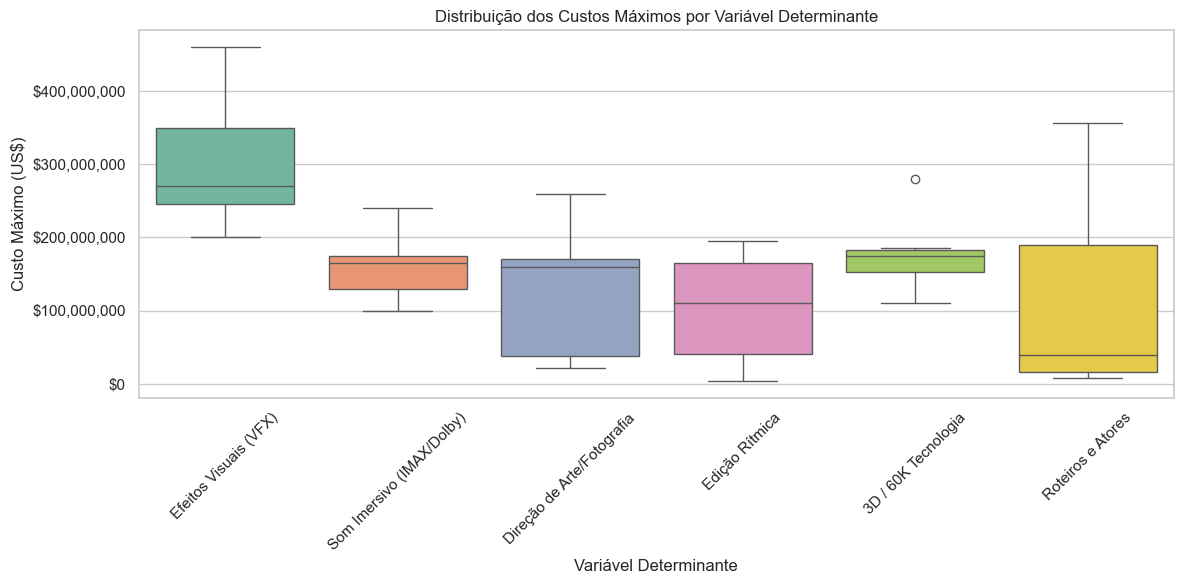

In [110]:
def convert_to_number(value):
    if isinstance(value, str):
        value = value.upper().replace('$', '').replace(',', '').strip()
        if value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
    return pd.to_numeric(value, errors='coerce')


df['Custo Máx (US$)'] = df['Custo Máx (US$)'].apply(convert_to_number)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Variável Determinante', y='Custo Máx (US$)', data=df, palette='Set2')

plt.title('Distribuição dos Custos Máximos por Variável Determinante')
plt.xlabel('Variável Determinante')
plt.ylabel('Custo Máximo (US$)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_15784\732800902.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


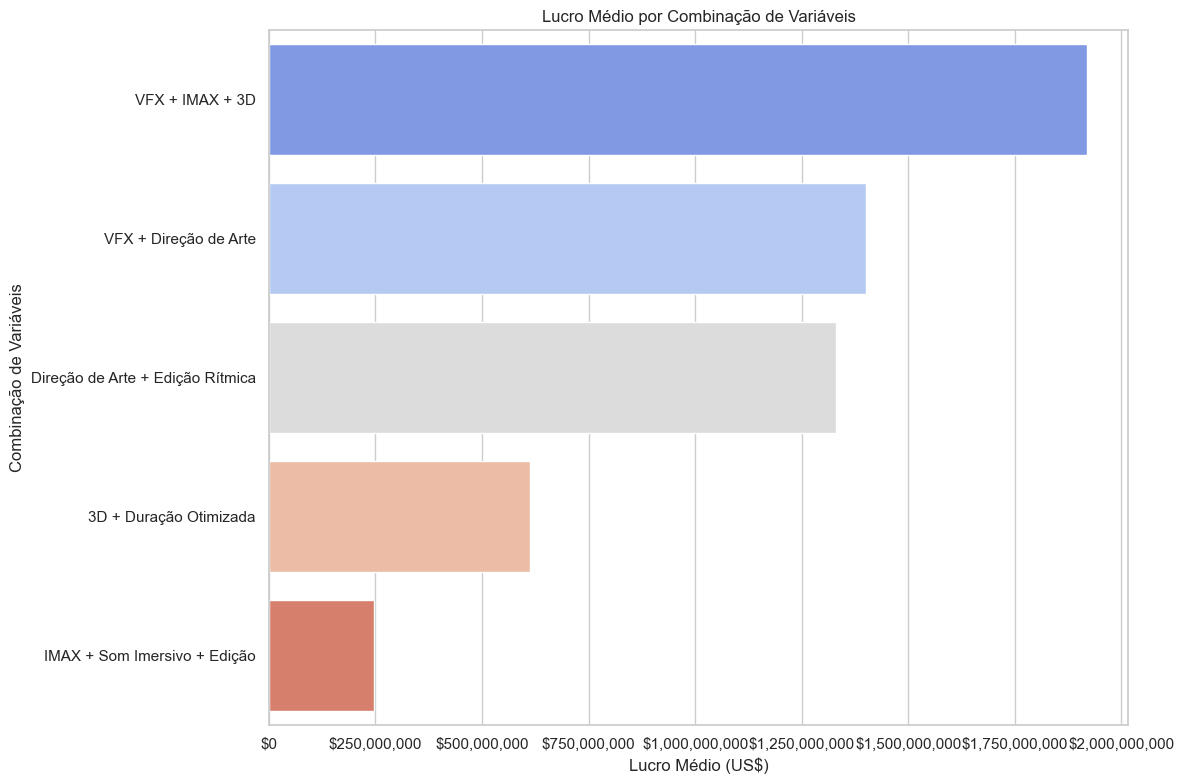

In [111]:
def convert_to_number(value):
    if isinstance(value, str):
        value = value.upper().replace('$', '').replace(',', '').strip()
        if value.endswith('M'):
            return float(value[:-1]) * 1e6
        elif value.endswith('B'):
            return float(value[:-1]) * 1e9
    return pd.to_numeric(value, errors='coerce')

df = pd.read_excel(fatores_lucro_sp, sheet_name="combinacoes_variaveis")

df['Lucro Médio (US$)'] = df['Lucro Médio (US$)'].apply(convert_to_number)

df_sorted = df.sort_values('Lucro Médio (US$)', ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Lucro Médio (US$)',
    y='Combinação de Variáveis',
    data=df_sorted,
    palette='coolwarm'
)

plt.title('Lucro Médio por Combinação de Variáveis')
plt.xlabel('Lucro Médio (US$)')
plt.ylabel('Combinação de Variáveis')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

---

In [112]:
display(df_cv)

,Combinação de Variáveis,Filme Exemplo,Custo Min (US$),Custo Médio (US$),Custo Máx (US$),Receita Min (US$),Receita Média (US$),Receita Máx (US$),Lucro Médio (US$)
0,VFX + IMAX + 3D,Avatar: O Caminho da Água (2022),350M,400M,460M,2.0B,2.32B,2.32B,1.92B
1,Direção de Arte + Edição Rítmica,Velozes & Furiosos 7 (2015),190M,190M,190M,1.5B,1.52B,1.52B,1.33B
2,3D + Duração Otimizada,Gravidade (2013),100M,110M,110M,723M,723.2M,723.2M,613.2M
3,VFX + Direção de Arte,O Rei Leão (2019),250M,260M,260M,1.6B,1.66B,1.66B,1.4B
4,IMAX + Som Imersivo + Edição,Duna (2021),150M,165M,165M,400M,410.7M,410.7M,245.7M


### 📚 Fontes Utilizadas
---

#### 🎬 **Avatar: O Caminho da Água (2022)**
- **Orçamento:** US$ 400 milhões  
- **Bilheteria Mundial:** US$ 2,320,250,281  
- **Fontes:**  
  - [The Numbers](https://www.the-numbers.com/movie/Avatar-The-Way-of-Water-%282022%29)  
  - [Box Office Mojo](https://www.boxofficemojo.com/title/tt1630029/)

---

#### 🎬 **Duna (2021)**
- **Orçamento:** US$ 165 milhões  
- **Bilheteria Mundial:** US$ 410,668,018  
- **Fontes:**  
  - [The Numbers](https://www.the-numbers.com/movie/Dune-%282020%29)  
  - [Box Office Mojo](https://www.boxofficemojo.com/title/tt1160419/)

---

#### 🎬 **O Rei Leão (2019)**
- **Orçamento:** US$ 260 milhões  
- **Bilheteria Mundial:** US$ 1,662,899,439  
- **Fontes:**  
  - [The Numbers](https://www.the-numbers.com/movie/Lion-King-The-%28Live-Action%29-%282019%29)  
  - [Box Office Mojo](https://www.boxofficemojo.com/release/rl3321923073/)

---

#### 🎬 **Velozes & Furiosos 7 (2015)**
- **Orçamento:** US$ 190 milhões  
- **Bilheteria Mundial:** US$ 1,515,341,399  
- **Fontes:**  
  - [The Numbers](https://www.the-numbers.com/movie/Furious-7)  
  - [Box Office Mojo](https://www.boxofficemojo.com/showdown/sd1816000004/)

---

#### 🎬 **Gravidade (2013)**
- **Orçamento:** US$ 110 milhões  
- **Bilheteria Mundial:** US$ 723,192,705  
- **Fontes:**  
  - [The Numbers](https://www.the-numbers.com/movie/Gravity-%282013%29)  
  - [Box Office Mojo](https://www.boxofficemojo.com/release/rl89622017/)
